In [10]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Load the model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL, output_hidden_states=True)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:

# Load your CSV data
csv_file_path = r"C:\Users\alyas\Desktop\TER\test_sentiment_analysis\all_emo.csv"
df = pd.read_csv(csv_file_path)

# DataFrame with id, Text, positive, neutral, negative, Sentiment
df_sentiment = df[['id', 'Text', 'positive', 'neutral', 'negative', 'Sentiment']]

# DataFrame with id, Text, anger, anticipation, disgust, fear, joy, love, optimism, pessimism, sadness, surprise, trust, Emotion
df_emotion = df[['id', 'Text', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'Emotion']]

df_emotion

,id,Text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,Emotion
0,1370044456842493954,Do fasting mimicking diets during chemotherapy...,0.032056,0.596309,0.058981,0.139670,0.132072,0.008831,0.616930,0.095059,0.088055,0.044444,0.093437,optimism
1,794281747043250176,#fasting may improve #cancer #treatment but ne...,0.022058,0.541630,0.033564,0.135428,0.152157,0.010925,0.683761,0.056417,0.043668,0.030434,0.113307,optimism
2,1148806240010588161,Take notes.\n\nOrder your seamoss and receive ...,0.027067,0.228047,0.020704,0.013944,0.811792,0.026598,0.896001,0.012078,0.018877,0.017472,0.113543,optimism
3,643251385035657216,If you've ever been affected by #cancer #MUSTR...,0.186106,0.097804,0.293471,0.611395,0.008646,0.003616,0.175571,0.475258,0.685823,0.010338,0.016174,sadness
4,1295469082221981696,The latest The STEM Daily! http #fasting #cancer,0.069157,0.074829,0.156392,0.220893,0.044991,0.004764,0.107376,0.211693,0.585573,0.010272,0.006690,sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,91659659072647168,Cured: A Cannabis Story (A film by David Tripl...,0.021431,0.145272,0.054925,0.100153,0.253857,0.013910,0.564682,0.146528,0.526767,0.010223,0.024983,optimism
2740,98751766488813568,"#Cannabis healing, the truth: http ""the govern...",0.235763,0.172389,0.146248,0.028766,0.177177,0.009510,0.907898,0.094388,0.166013,0.007790,0.089246,optimism
2741,194423800673206272,Medical #marijuana bill passes committee - #Ca...,0.047253,0.303865,0.149934,0.159055,0.105655,0.006099,0.160913,0.096040,0.254947,0.039387,0.015306,anticipation
2742,197566368059637761,http If you have medical condition being treat...,0.010760,0.397759,0.025006,0.121341,0.168019,0.014589,0.651057,0.124955,0.232282,0.013428,0.063384,optimism


# TSNE SENTIMENT

In [13]:
# Initialize lists to store hidden states and labels
hidden_states_list = []
labels = []

# Iterate over each tweet in the dataframe
for index, row in df_sentiment.iterrows():
    # Tokenize and classify
    encoded_input = tokenizer(row["Text"], return_tensors='pt')
    output = model(**encoded_input)
    
    # Extract hidden states for the tweet
    hidden_states = output.hidden_states[-1][0, 0, :].detach().numpy()
    
    # Append to lists
    hidden_states_list.append(hidden_states)
    labels.append(row["Sentiment"])

# Convert lists to numpy arrays
hidden_states_array = np.array(hidden_states_list)


# Perform t-SNE on the hidden states
tsne = TSNE(n_components=2, perplexity= 150, random_state=42)
# Perform t-SNE on the hidden states
print("Number of samples:", hidden_states_array.shape[0])
print("Perplexity value:", tsne.perplexity)
embedded_states = tsne.fit_transform(hidden_states_array)


# Create a DataFrame for the t-SNE output
tsne_df = pd.DataFrame(embedded_states, columns=['x', 'y'])
tsne_df['Sentiment'] = df_sentiment['Sentiment'].values


Number of samples: 2744
Perplexity value: 150


In [14]:
import plotly.express as px
import pandas as pd

# Define custom colors for sentiments
color_discrete_map = {
    'pos': 'green',  # Green for positive
    'neutral': 'blue',  # Gold for neutral
    'neg': 'red'  # Red for negative
}

# Plot using Plotly with custom colors
fig = px.scatter(tsne_df, x='x', y='y', color='Sentiment',
                 title='t-SNE Visualization of Feature Spaces for Sentiment Analysis',
                 labels={'x': 'Component 1', 'y': 'Component 2'},
                 color_discrete_map=color_discrete_map)

# Customize the layout for a black theme
fig.update_layout(
    plot_bgcolor='white',  # Fully opaque black background
    paper_bgcolor='white',  # Fully opaque black paper background
    font_color='black',  # White font for contrast
    legend_title_text='Sentiment',
    legend=dict(
        traceorder='normal',
        font=dict(
            size=12,
            color='black'
        ),
        bgcolor='white'  # Semi-transparent legend background
    )
)

# Customize the zero lines to be light grey with transparency
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(211, 211, 211, 0.5)',
                 zeroline=True, zerolinewidth=2, zerolinecolor='rgba(211, 211, 211, 0.5)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(211, 211, 211, 0.5)',
                 zeroline=True, zerolinewidth=2, zerolinecolor='rgba(211, 211, 211, 0.5)')

# Show the plot
fig.show()


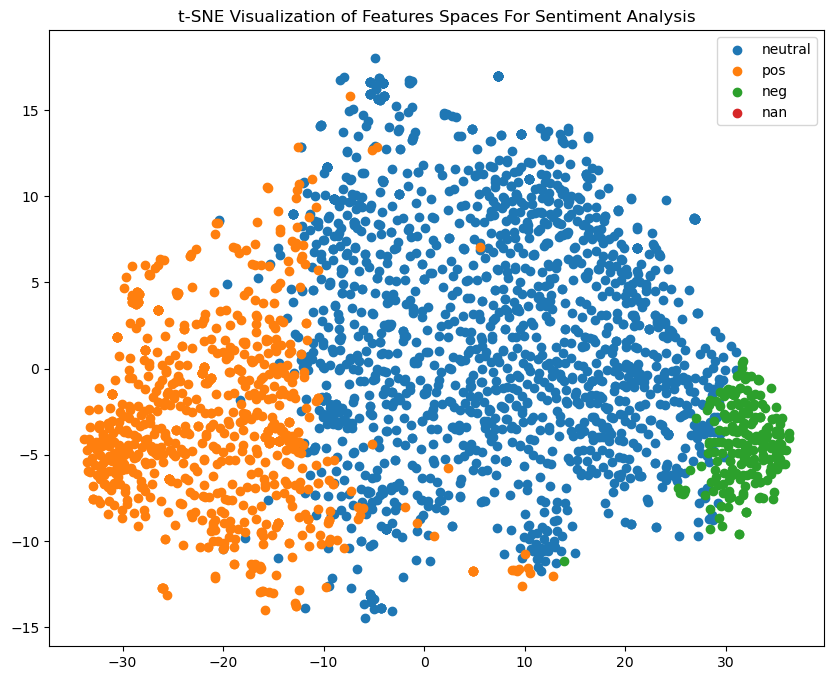

<Figure size 640x480 with 0 Axes>

In [15]:

# Plot the embedded states with different colors for each sentiment
plt.figure(figsize=(10, 8))
for sentiment in df_sentiment["Sentiment"].unique():
    indices = df_sentiment[df_sentiment["Sentiment"] == sentiment].index
    plt.scatter(embedded_states[indices, 0], embedded_states[indices, 1], label=sentiment)

plt.title('t-SNE Visualization of Features Spaces For Sentiment Analysis')
plt.legend()
plt.show()

# Sauvegarde de la figure comme une image 
plt.savefig('tsne_sentiment.png')

# BAR PLOT EMOTIONS

In [16]:
import plotly.express as px
import pandas as pd

# Count the frequency of each emotion
emotion_counts = df['Emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Frequency']

# Assuming emotion_counts is already created from previous steps
# Map each unique emotion to a number
unique_emotions = emotion_counts['Emotion'].unique()
emotion_to_number = {emotion: i for i, emotion in enumerate(unique_emotions)}

# Normalize the frequency to get a gradient effect in the colors
emotion_counts['Color'] = emotion_counts['Frequency'] / emotion_counts['Frequency'].max()

# Create the bar plot with gradient blue colors
fig = px.bar(emotion_counts, x='Emotion', y='Frequency',
             color='Color',  # Use the normalized frequency for color
             color_continuous_scale='Blues')  # Apply a blue color scale

# Modify the layout for a black theme
fig.update_layout(
    title='Frequency of Each Emotion',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    showlegend=False,  # Hide the legend
    xaxis=dict(
        title='Emotion',
        titlefont_size=16,
        color='white'
    ),
    yaxis=dict(
        title='Frequency',
        titlefont_size=16,
        color='white'
    )
)

# Remove the color scale legend
fig.update_layout(coloraxis_showscale=False)

# Show the plot
fig.show()


In [17]:
import plotly.express as px
import pandas as pd

# Count the occurrences of each emotion
emotion_counts = df['Emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Calculate the frequency for each emotion
total_count = emotion_counts['Count'].sum()
emotion_counts['Frequency'] = emotion_counts['Count'] / total_count

# Map each unique emotion to a number
unique_emotions = emotion_counts['Emotion'].unique()
emotion_to_number = {emotion: i for i, emotion in enumerate(unique_emotions)}

# Normalize the frequency to get a gradient effect in the colors
emotion_counts['Color'] = emotion_counts['Frequency'] / emotion_counts['Frequency'].max()

# Create the bar plot with gradient blue colors
fig = px.bar(emotion_counts, x='Emotion', y='Frequency',
             color='Color',  # Use the normalized frequency for color
             color_continuous_scale='Blues')  # Apply a blue color scale

# Modify the layout for a black theme
fig.update_layout(
    title='Proportion of Each Emotion',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    showlegend=False,  # Hide the legend
    xaxis=dict(
        title='Emotion',
        titlefont_size=16,
        color='white'
    ),
    yaxis=dict(
        title='Proportion',
        titlefont_size=16,
        color='white'
    )
)

# Remove the color scale legend
fig.update_layout(coloraxis_showscale=False)

# Show the plot
fig.show()


In [18]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Count the occurrences of each emotion
emotion_counts = df['Emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Calculate the frequency for each emotion
total_count = emotion_counts['Count'].sum()
emotion_counts['Frequency'] = emotion_counts['Count'] / total_count

# Create the pie chart
fig = px.pie(emotion_counts, values='Frequency', names='Emotion', title='Proportion of Each Emotion')

# Customize the layout for a black theme
fig.update_layout(
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black',  # Background color outside the plot area
    font_color='white'  # Text color
)

# Show the plot
fig.show()


In [19]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Count the occurrences of each emotion
emotion_counts = df['Emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Calculate the frequency for each emotion
total_count = emotion_counts['Count'].sum()
emotion_counts['Frequency'] = emotion_counts['Count'] / total_count

# Create a list of blue shades
blue_shades = [
    '#003f5c',  # Very dark blue
    '#2f4b7c',
    '#665191',
    '#a05195',
    '#d45087',
    '#f95d6a',
    '#ff7c43',  # Lighter, but still with a blue-ish undertone
    '#ffa600',  # Lightest, with a hint of blue undertone
]

# Make sure we have enough colors by repeating the list if necessary
num_emotions = len(emotion_counts['Emotion'].unique())
blue_shades = blue_shades * (num_emotions // len(blue_shades)) + blue_shades[:num_emotions % len(blue_shades)]

# Create the pie chart with the blue shades
fig = px.pie(emotion_counts, values='Frequency', names='Emotion', title='Proportion of Each Emotion',
             color_discrete_sequence=blue_shades)

# Customize the layout for a black theme and adjust text size
fig.update_traces(textinfo='percent+label', textfont_size=14)
fig.update_layout(
    plot_bgcolor='white',  # Background color
    paper_bgcolor='white',  # Background color outside the plot area
    font_color='black',  # Text color
    font_size=15,  # Base text size
    title_font_size=22  # Title text size
)

# Increase the size of the pie chart
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the chart
    height=600  # Height of the chart
)

# Show the plot
fig.show()


In [ ]:
# Initialize lists to store hidden states and labels
hidden_states_list = []
labels = []

# Iterate over each tweet in the dataframe
for index, row in df_emotion.iterrows():
    # Tokenize and classify
    encoded_input = tokenizer(row["Text"], return_tensors='pt')
    output = model(**encoded_input)
    
    # Extract hidden states for the tweet
    hidden_states = output.hidden_states[-1][0, 0, :].detach().numpy()
    
    # Append to lists
    hidden_states_list.append(hidden_states)
    labels.append(row["Emotion"])

# Convert lists to numpy arrays
hidden_states_array = np.array(hidden_states_list)


# Perform t-SNE on the hidden states
tsne = TSNE(n_components=6, perplexity= 75, random_state=42)
# Perform t-SNE on the hidden states
print("Number of samples:", hidden_states_array.shape[0])
print("Perplexity value:", tsne.perplexity)
embedded_states = tsne.fit_transform(hidden_states_array)
embedded_states = tsne.fit_transform(hidden_states_array)


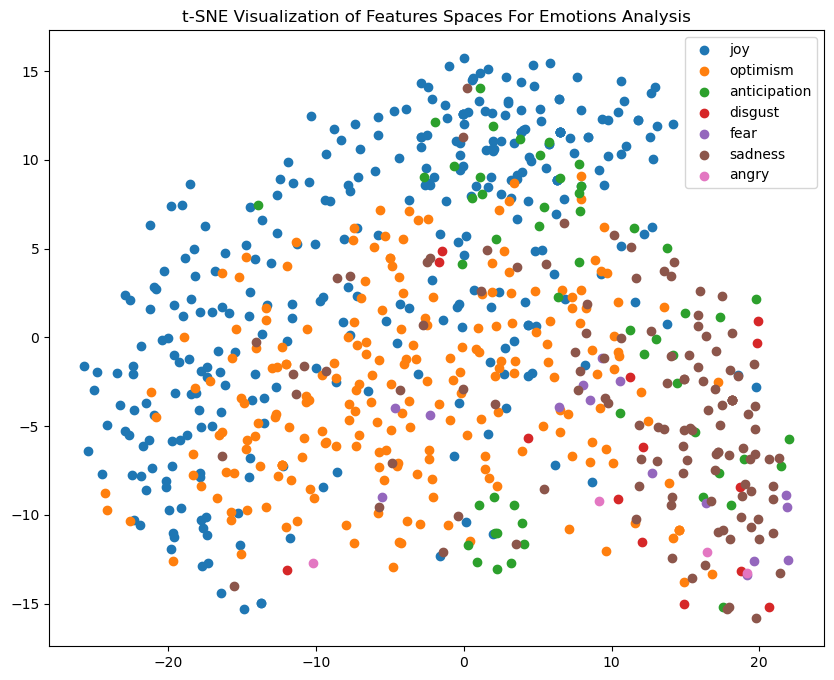

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the embedded states with different colors for each sentiment
plt.figure(figsize=(10, 8))
for emotion in df_emotion["Emotion"].unique():
    indices = df_emotion[df_emotion["Emotion"] == emotion].index
    plt.scatter(embedded_states[indices, 0], embedded_states[indices, 1], label=emotion)

plt.title('t-SNE Visualization of Features Spaces For Emotions Analysis')
plt.legend()
plt.show()
# Sauvegarde de la figure comme une image 
plt.savefig('tsne_emo_.png')